<a href="https://colab.research.google.com/github/jayblue27/works4_myself/blob/main/%20/%ED%95%84%EC%82%AC/%5B%ED%95%84%EC%82%AC%5D%EC%97%B0%ED%95%A9%EB%89%B4%EC%8A%A4_%ED%86%A0%ED%94%BD_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. 연합뉴스 타이틀 주제 분류 데이터 탐색과 시각화

- KLUE (
https://klue-benchmark.com/)

#### conda 환경이랑 pip 환경이랑 차이점

In [1]:
!pip install wordcloud

# 2. 라이브러리 로드

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 이제현님이 공유 해주신 시각화도구 한글화 자료

#3. 시각화를 위한 폰트 설정

In [8]:
from inspect import findsource
def get_font_family():
    '''
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    '''
    import platform
    system_name = platform.system()

    if system_name == 'Darwin' :
        font_faimly = 'AppleGothic'
    elif system_name == 'Windows':
        font_family = 'Malgun Gothic'
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont

        font_family = 'NanumBarunGothic'

    return font_family


        

In [9]:
# style 설정은 꼭 폰트설정 위에서 한다. 
# style에 폰트 설정이 들어있으면 한글폰트가 초기화 되어 깨진다.
plt.style.use('seaborn')

#폰트설정
plt.rc('font', family=get_font_family())

#마이너스폰트 설정
plt.rc('axes', unicode_minus=False)

# 그래프에 retina display 적용
# 그래프 해상도 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


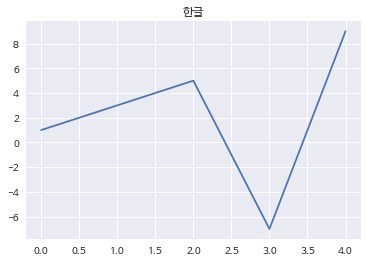

In [16]:
#한글폰트 동작확인
pd.Series([1,3,5,-7,9]).plot(title='한글');

#4. 데이터로드

In [18]:
#압축풀 경로로 이동
%cd /content/drive/MyDrive/프로젝트/[데이콘]연합뉴스 토픽분석/input
#압축해제
!unzip -qq "/content/drive/MyDrive/프로젝트/[데이콘]연합뉴스 토픽분석/input/open.zip"

/content/drive/MyDrive/프로젝트/[데이콘]연합뉴스 토픽분석/input


In [19]:
import os
fpath = '/content/drive/MyDrive/프로젝트/[데이콘]연합뉴스 토픽분석/input/train_data.csv'
if os.path.exists(fpath):
    print('해당 경로에 파일이 있습니다.')
else:
    file_path = os.getcwd() + '/'+ fpath
    print(f'{file_path} 경로를 확인해 주세요.')
    print('출력되는 경로를 파일 탐색기로 열어 들어갔을 때 해당 파일이 있어야 합니다.')

해당 경로에 파일이 있습니다.


In [20]:
#1. 학습 및 예측 데이터셋 불러오기
train = pd.read_csv('/content/drive/MyDrive/프로젝트/[데이콘]연합뉴스 토픽분석/input/train_data.csv')
test = pd.read_csv('/content/drive/MyDrive/프로젝트/[데이콘]연합뉴스 토픽분석/input/test_data.csv')

#2. shape로 행과 열의 크기 출력
train.shape, test.shape

((45654, 3), (9131, 2))

In [21]:
# head로 train 상위 데이터 불러오기
train.head()

,index,title,topic_idx
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4


In [22]:
# test 상위 데이터
test.head()

,index,title
0,45654,유튜브 내달 2일까지 크리에이터 지원 공간 운영
1,45655,어버이날 맑다가 흐려져…남부지방 옅은 황사
2,45656,내년부터 국가RD 평가 때 논문건수는 반영 않는다
3,45657,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것
4,45658,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간


In [23]:
# 토픽(topic_dict.csv) 불러오기
topic = pd.read_csv('/content/drive/MyDrive/프로젝트/[데이콘]연합뉴스 토픽분석/input/topic_dict.csv')
topic

,topic,topic_idx
0,IT과학,0
1,경제,1
2,사회,2
3,생활문화,3
4,세계,4
5,스포츠,5
6,정치,6


#5. 전처리를 위한 데이터 병합

In [26]:
# 토픽에 어떤 값이 있는지 values로 확인
topic['topic'].values

array(['IT과학', '경제', '사회', '생활문화', '세계', '스포츠', '정치'], dtype=object)

##5.1 concat
- train, test 합치기
- 뭐가 번거로워서? 

In [29]:
# 전처리 위해서 concat으로 데이터 병합
raw = pd.concat([train, test])
raw.shape

(54785, 3)

In [32]:
# concat 제대로 합쳐졌는지 확인
train.shape[0] + test.shape[0]

54785

In [33]:
#head
raw.head()

,index,title,topic_idx
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0


In [34]:
#tail
raw.tail()

,index,title,topic_idx
9126,54780,인천 오후 3시35분 대설주의보…눈 3.1cm 쌓여,NaN
9127,54781,노래방에서 지인 성추행 외교부 사무관 불구속 입건종합,NaN
9128,54782,40년 전 부마항쟁 부산 시위 사진 2점 최초 공개,NaN
9129,54783,게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계,NaN
9130,54784,유영민 과기장관 강소특구는 지역 혁신의 중심…지원책 강구,NaN


##5.2 merge
- 토픽(숫자)값에 문자값 붙이기 위해서 

In [39]:
# raw를 topic데이터와 merge(how='left')

# raw.merge(topic, on='topic_idx')
# 기본값 innerjoin
df = raw.merge(topic, on='topic_idx', how='left')
df.shape

(54785, 4)

In [38]:
# merge 확인
df.head()

,index,title,topic_idx,topic
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0,세계
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0,세계
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0,세계
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0,세계
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0,세계


#6. 정답값 빈도수